# Using 'Isotope' class for Picarro calculations

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator


This notebook makes use of a new python class: Isotope.
This class and its methods are found in the module Picarro, which we import below.

In [30]:
import Picarro as pica

## Get a full run of the data
In the Picarro module, it is possible to directly call for a full run of the data.

This takes the form of:

   ```RUN = Picarro.FullRun(filename)```

and returns two instances of the Merged class.

In [31]:
#

RUN = pica.Isotope('example_data/HKDS2009_IsoWater_20190109_092249.csv')
RUN.readRaw()
RUN.checkEmpty()
RUN.checkVolume()
RUN.setPrimaryKey()
RUN.runSummary()
RUN.IsotopeSelect('O')
RUN.initMemCoeffs()
RUN.Optimize('O',method = 'default')

Cannot convert column Analysis to numeric type
Cannot convert column Time Code to numeric type
Cannot convert column Port to numeric type
Cannot convert column Gas Configuration to numeric type
Cannot convert column Method to numeric type


In [32]:
RUN.corr.loc["KB2_38m"]

key   Line  d(18_16)Mean  Ignore  Error Code  \
Identifier 2      Inj Nr                                                    
181129Voegelsberg 1       9142.0  105.0       -15.593    -1.0         0.0   
                  3       9142.0  107.0       -15.938    -1.0         0.0   
                  4       9142.0  108.0       -15.679     0.0         0.0   

                                RUN_ID  
Identifier 2      Inj Nr                
181129Voegelsberg 1       2.019011e+13  
                  3       2.019011e+13  
                  4       2.019011e+13

In [33]:
df = RUN.corr["Line"]

coeffs = [RUN.coeffs[i] for i in RUN.coeffs]

conditioning = df[0:4].values
coeff_conditioning = [1,1,1,1]

standards = df[4:24].values-1-(df[4:24].values-1) %10

samples = df[24:].values -1-(df[24:].values-1) %4
coeff_standards = coeffs * 2
previous = list(conditioning) + list(standards) + list(samples)
coeff_samples = []
index_diff = (RUN.corr["Line"].values[24:])%4
for i in index_diff:
    coeff_samples.append(coeffs[int(i)])
new_list =  coeff_conditioning + coeff_standards + coeff_samples


In [6]:
mylist = []
index_diff = (RUN.corr["Line"].values[34:]-1)%4
for i in index_diff:
    print(int(i))
    mylist.append(coeffs[int(i)])

print(mylist)

0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
[0.8574802421156115, 0.9610520242588805, 0.9864610217045272, 0.9924567781337142, 0.8574802421156115, 0.9610520242588805, 0.9864610217045272, 0.9924567781337142, 0.8574802421156115, 0.9610520242588805, 0.9864610217045272, 0.9924567781337142, 0.8574802421156115, 0.9610520242588805, 0.9864610217045272, 0.9924567781337142, 0.8574802421156115, 0.9610520242588805, 0.9864610217045272, 0.9924567781337142, 0.8574802421156115, 0.9610520242588805, 0.9864610217045272, 0.9924567781337142, 0.8574802421156115, 0.9610520242588805, 0.9864610217045272, 0.9924567781337142, 0.8574802421156115, 0.9610520242588805, 0.9864610217045272, 0.9924567781337142, 0.8574802421156115, 0.9610520242588805, 0.9864610217045272, 0.9924567781337142, 0.8574802421156115, 0.9610520242588805, 0.9864610217045272, 0.9924567781337142, 0.857480242115611

## Overview of the Isotope class

In the **Isotope** class, a variety of methods are available, so of which are used discreetly in the `FullRun()` function above.

They are:

For an initial treatment of the data:
```
readRaw() 
checkEmpty()
checkVolume()
runSummary()
```

For the computation of correction coefficients (workhorse of the class)
```
IsotopeSelect()
initMemCoeffs()
Optimize()
MemoryCorrection()
driftCorrect()
VSMOWcorrect()
```

For additional checks
```
getMeanSDs()
checkStandards()
```

For plotting convenience:

```
plotSummary()
memCorrPlot()
driftCorrPlot()
VSMOWCorrPlot()
```

## Other functions of the Picarro module

Below are a list of other functions available within the Picarro module:

```
1) Run()
2) FullRun()
3) Merge()
4) OverviewPlot()
5) DatatoCSV()
```

#### 1 Picarro.Run()

This function takes in two arguments: 
1. Isotope of choice: "O" or "D"
2. Filename: the path to csv data

Returns an object of class **Isotope**

An example usage: 

``` Isotope = Picarro.Run(isotope,path/to/file)```

#### 2 Picarro.FullRun()

This function takes in one argument:
1. Filename: the path to csv data

It returns one object of class **Merge**. This instance of class **Merged** has two class variables: O18 and D, which are themselves of Class **Isotope**, so all the above methods can be called on them.

Example usage:

``` RUN = Picarro.FullRun(path/to_file)```

*Note that this is what was done in the cells above, for the 'quick and dirty' full run of the data*



#### 3 Picarro.Merge()

This function takes two arguments; each must be an instance of class **Isotope**. It returns a pandas DataFrame, containing the summary data of the run.

Example usage: 

``` df = Picarro.Merge(Iso1,Iso2)```



In [7]:
RUN.O18.plotSummary()

AttributeError: 'Isotope' object has no attribute 'O18'

In [19]:
RUN = pica.FullRun('example_data/HKDS2009_IsoWater_20190417_075229.csv')

Running the corrections for Oxygen 
 ... 
 ...
Cannot convert column Analysis to numeric type
Cannot convert column Time Code to numeric type
Cannot convert column Port to numeric type
Cannot convert column Gas Configuration to numeric type
Cannot convert column Method to numeric type
creating a directory to store the data
Checking: Q12-WH ...
Standard dev is good
9549.0
Checking: Q53-WH ...
Standard dev is good
9534.0
Checking: Q13-WH ...
Standard dev too high get rid of measurement 1
9545.0
Checking: Q1-WH ...
get rid of measurements  2 and 3
9546.0
Checking: Q54-WH ...
Standard dev is good
9536.0
Checking: Q3-WH ...
Standard dev is good
9547.0
9527.0
9530.0
Checking: S16-WH ...
Standard dev too high get rid of measurement 3
9543.0
Checking: Q52-WH ...
Standard dev is good
9533.0
9528.0
Checking: Q56-WH ...
Standard dev too high get rid of measurement 1
9538.0
Checking: S23-WH ...
Standard dev too high get rid of measurement 1
9541.0
9529.0
Checking: Q57-WH ...
Standard dev is good
9

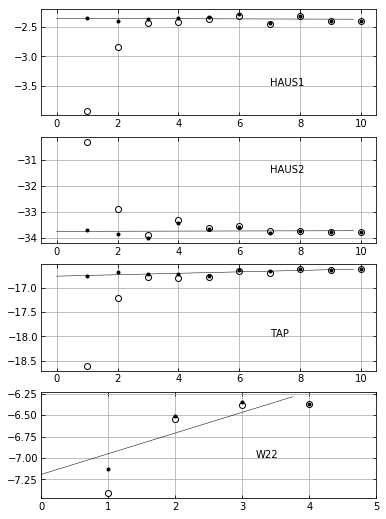

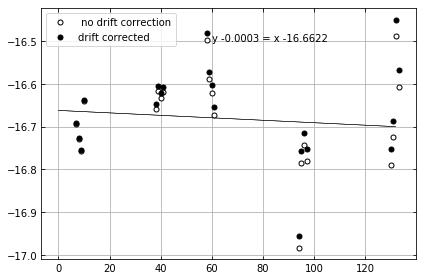

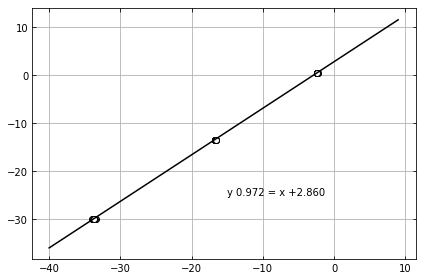

In [20]:
RUN.O18.memCorrPlot("O")
RUN.O18.driftCorrPlot("O")
RUN.O18.VSMOWCorrPlot("O")

In [29]:
RUN.O18.corr.head(30)

key  Line  d(18_16)Mean  Ignore  \
Identifier 1 Identifier 2 Inj Nr                                       
TAP          Conditioning 7       9527.0   7.0       -16.694     0.0   
                          8       9527.0   8.0       -16.729     0.0   
                          9       9527.0   9.0       -16.758     0.0   
                          10      9527.0  10.0       -16.641     0.0   
HAUS1        Standard     1       9528.0  11.0        -3.909    -1.0   
                          2       9528.0  12.0        -2.846    -1.0   
                          3       9528.0  13.0        -2.436    -1.0   
                          4       9528.0  14.0        -2.415     0.0   
                          5       9528.0  15.0        -2.371     0.0   
                          6       9528.0  16.0        -2.314     0.0   
                          7       9528.0  17.0        -2.460     0.0   
                          8       9528.0  18.0        -2.314     0.0   
                          9       9528.0  19.0        -2.400     0.0   
                          10      9528.0  20.0        -2.409     0.0   
HAUS2        Standard     1       9529.0  21.0       -30.310    -1.0   
                          2       9529.0  22.0       -32.891    -1.0   
                          3       9529.0  23.0       -33.884    -1.0   
                          4       9529.0  24.0       -33.318     0.0   
                          5       9529.0  25.0       -33.612     0.0   
                          6       9529.0  26.0       -33.537     0.0   
                          8       9529.0  28.0       -33.748     0.0   
                          9       9529.0  29.0       -33.743     0.0   
                          10      9529.0  30.0       -33.774     0.0   
                          11      9529.0  31.0       -33.761     0.0   
TAP          Standard     1       9530.0  32.0       -18.606    -1.0   
                          2       9530.0  33.0       -17.205    -1.0   
                          3       9530.0  34.0       -16.786    -1.0   
                          4       9530.0  35.0       -16.790     0.0   
                          5       9530.0  36.0       -16.782     0.0   
                          6       9530.0  37.0       -16.664     0.0   

                                  Error Code        RUN_ID    coeffs  \
Identifier 1 Identifier 2 Inj Nr                                       
TAP          Conditioning 7              0.0  2.019042e+13  1.000000   
                          8              0.0  2.019042e+13  1.000000   
                          9              0.0  2.019042e+13  1.000000   
                          10             0.0  2.019042e+13  1.000000   
HAUS1        Standard     1              0.0  2.019042e+13  0.878304   
                          2              0.0  2.019042e+13  0.968479   
                          3              0.0  2.019042e+13  0.995881   
                          4              0.0  2.019042e+13  0.995881   
                          5              0.0  2.019042e+13  0.998014   
                          6              0.0  2.019042e+13  0.998014   
                          7              0.0  2.019042e+13  0.998014   
                          8              0.0  2.019042e+13  1.000000   
                          9              0.0  2.019042e+13  1.000000   
                          10             0.0  2.019042e+13  1.000000   
HAUS2        Standard     1              0.0  2.019042e+13  0.878304   
                          2              0.0  2.019042e+13  0.968479   
                          3              0.0  2.019042e+13  0.995881   
                          4              0.0  2.019042e+13  0.995881   
                          5              0.0  2.019042e+13  0.998014   
                          6              0.0  2.019042e+13  0.998014   
                          8              0.0  2.019042e+13  0.998014   
                          9              0.0  2.019042e+13  1.000000   
    

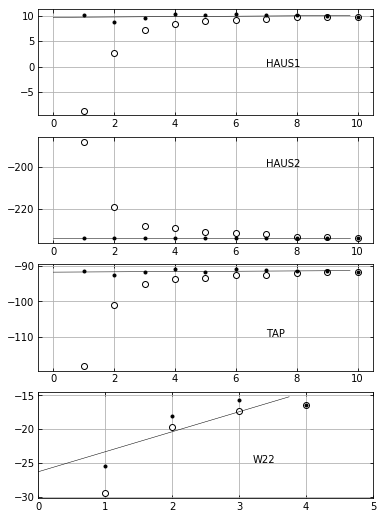

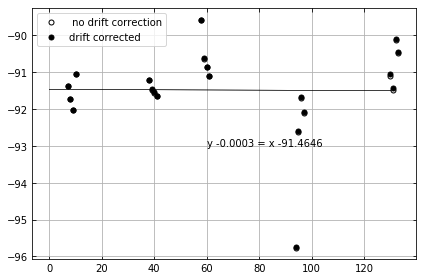

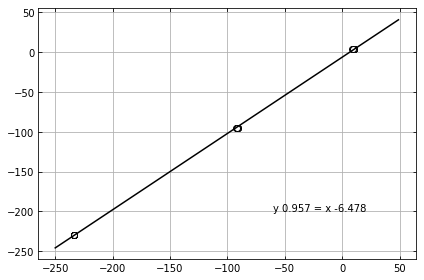

In [21]:
RUN.D.memCorrPlot("H")
RUN.D.driftCorrPlot("H")
RUN.D.VSMOWCorrPlot("H")

In [14]:
RUN.O18.corr

key   Line  d(18_16)Mean  Ignore  \
Identifier 1 Identifier 2      Inj Nr                                        
TAP          Conditioning      7       9122.0    7.0       -16.837     0.0   
                               8       9122.0    8.0       -16.400     0.0   
                               9       9122.0    9.0       -16.600     0.0   
                               10      9122.0   10.0       -16.649     0.0   
HAUS1        Standard          1       9123.0   11.0        -3.840    -1.0   
...                                       ...    ...           ...     ...   
VBQ92        181129Voegelsberg 4       9147.0  128.0       -14.866     0.0   
TAP          Control           1       9148.0  129.0       -16.399    -1.0   
                               2       9148.0  130.0       -16.597    -1.0   
                               3       9148.0  131.0       -16.670    -1.0   
                               4       9148.0  132.0       -16.638     0.0   

                                       Error Code        RUN_ID    coeffs  \
Identifier 1 Identifier 2      Inj Nr                                       
TAP          Conditioning      7              0.0  2.019011e+13  1.000000   
                               8              0.0  2.019011e+13  1.000000   
                               9              0.0  2.019011e+13  1.000000   
                               10             0.0  2.019011e+13  1.000000   
HAUS1        Standard          1              0.0  2.019011e+13  0.857480   
...                                           ...           ...       ...   
VBQ92        181129Voegelsberg 4              0.0  2.019011e+13  0.992457   
TAP          Control           1              0.0  2.019011e+13  0.857480   
                               2              0.0  2.019011e+13  0.961052   
                               3              0.0  2.019011e+13  0.986461   
                               4              0.0  2.019011e+13  0.992457   

                                       previous  d(18_16)mem_corrected  
Identifier 1 Identifier 2      Inj Nr                                   
TAP          Conditioning      7            7.0             -16.837000  
                               8            8.0             -16.400000  
                               9            9.0             -16.600000  
                               10          10.0             -16.649000  
HAUS1        Standard          1           10.0              -2.014464  
...                                         ...                    ...  
VBQ92        181129Voegelsberg 4          124.0             -14.866920  
TAP          Control           1          128.0             -16.399000  
                               2          128.0             -16.604712  
                               3          128.0             -16.673669  
                               4          128.0             -16.639803  

[125 rows x 9 columns]

In [22]:
RUN.coeffs

,O,H
1,0.878304,0.770014
2,0.968479,0.935299
3,0.995881,0.976286
4,0.995881,0.979277
5,0.998014,0.988137
6,0.998014,0.989279
7,0.998014,0.990887
8,1.000000,0.996815
9,1.000000,0.998606
10,1.000000,1.000000


#### 4 Picarro.OverviewPlot()

This function takes two arguments; each must be an instance of class **Isotope**. It enables the plotting of the summary data.

Example usage:

```Picarro.OverviewPlot(Iso1,Iso2)```


#### 5 Picarro.DatatoCSV()

This function takes two arguments; each must be an instance of class **Isotope**. The function writes the data to csv file for convenience of the user. 

Further development should include:

1. Checking that the file does not already exist.
2. Writing a new file it does not.

Example usage:

```Picarro.DatatoCSV(Iso1,Iso2)```



In [ ]:
RUN.coeffs["H"]

In [ ]:
RUN.suggestedReruns()

In [24]:
RUN.merge

,Identifier 1,Identifier 2,RUN_ID,position,d18O vsmow,d18O stdev. vsmow,d18O counts,d2H vsmow,d2H stdev. vsmow,d2H counts,inside GMWL
key,,,,,,,,,,,
9527.0,TAP,_Conditioning,2.019042e+13,1.0,-13.367368,0.049023,4,-94.115743,0.405802,4,inside
9528.0,HAUS1,_Standard,2.019042e+13,2.0,0.562966,0.044912,10,3.050470,0.477358,10,outside
9529.0,HAUS2,_Standard,2.019042e+13,3.0,-29.909604,0.147067,10,-230.260653,0.000903,10,inside
9530.0,TAP,_Standard,2.019042e+13,4.0,-13.333363,0.054103,10,-94.089817,0.425426,10,inside
9531.0,W22,_Control W22,2.019042e+13,5.0,-3.527833,0.354016,4,-24.563434,4.319123,4,inside
9532.0,Q51-WH,190326Voegelsberg,2.019042e+13,6.0,-11.534518,0.046102,2,-80.475235,0.632523,2,inside
9533.0,Q52-WH,190326Voegelsberg,2.019042e+13,7.0,-11.707927,0.054440,4,-82.581162,0.444805,4,inside
9534.0,Q53-WH,190326Voegelsberg,2.019042e+13,8.0,-11.743033,0.023319,4,-82.537373,0.130072,4,inside
9535.0,TAP,_Control 1,2.019042e+13,9.0,-13.220478,0.061648,3,-92.971383,0.649725,3,inside
